# Regressió

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Exemple: Boston data set

In [2]:
# from sklearn.datasets import load_boston
# data = load_boston()
# print(data.keys()) # Data conté la X (data) la y (target) i informació sobre les dades

In [3]:
df = pd.read_csv("./DataSets/HousingData.csv").dropna()
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94  33.4
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7  394.12   5.21  28.7
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...      ...     ...    ...   ...
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391     19.2  395.77  15.10  17.5
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391     19.2  396.90  14.33  16.8
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   9.08  20.6


In [4]:
# data.data.shape # 506 observacions, 13 variables
# len(data.target)
# data.feature_names
# print(data.DESCR)

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


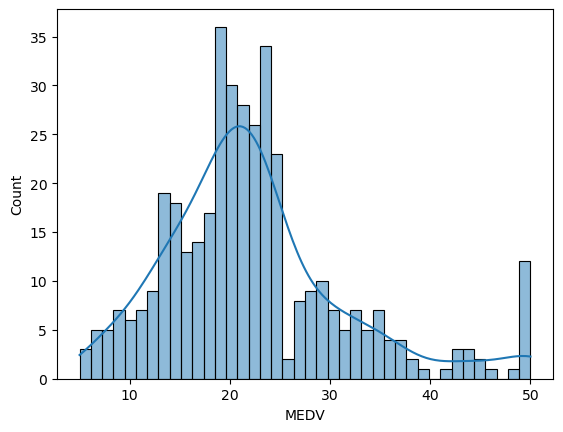

In [6]:
sns.histplot(df['MEDV'], bins = 40, kde=True);

### Feature selection

Habitualment, per evitar sobreajust i models complexes que no aporten res, s'escullen les variables que expliquen més del nostre target i es para atenció a les correlacions.

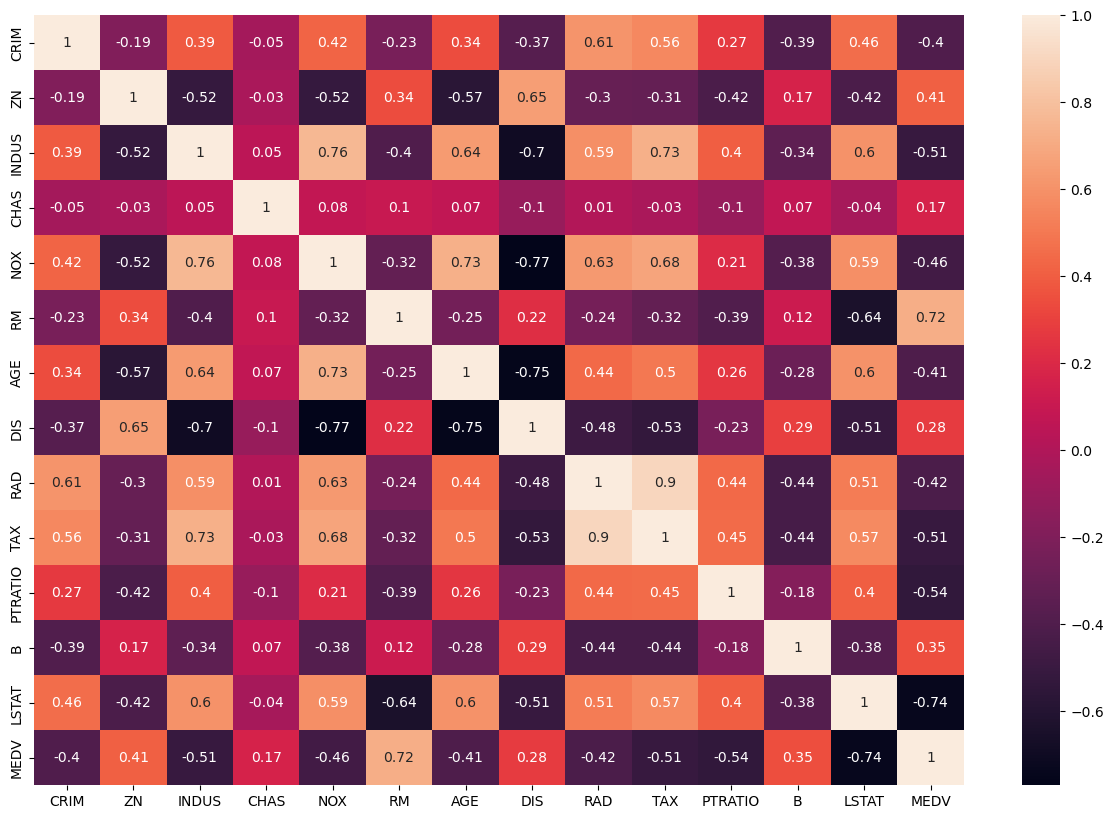

In [7]:
correlation_matrix = df.corr().round(2) # arrodonir a 2 decimals
plt.figure(figsize = (15,10))
sns.heatmap(data = correlation_matrix, annot = True);

Idealment, per a regressió escollim les variables més informatives respecte la variable que volem predir. Per això prendrem les que tenen una correlació major a 0.55 en valor absolut. Nota: no és un pas 100% necessari, ja que es pot aplicar regularització. De la mateixa manera podríem prendre un altre threshold.

In [8]:
corr_target = correlation_matrix.loc['MEDV',:]
corr_target[np.abs(corr_target) > 0.55]

RM       0.72
LSTAT   -0.74
MEDV     1.00
Name: MEDV, dtype: float64

Podem observar la relació que hi ha entre les dues variables escollides i la variable resposta.

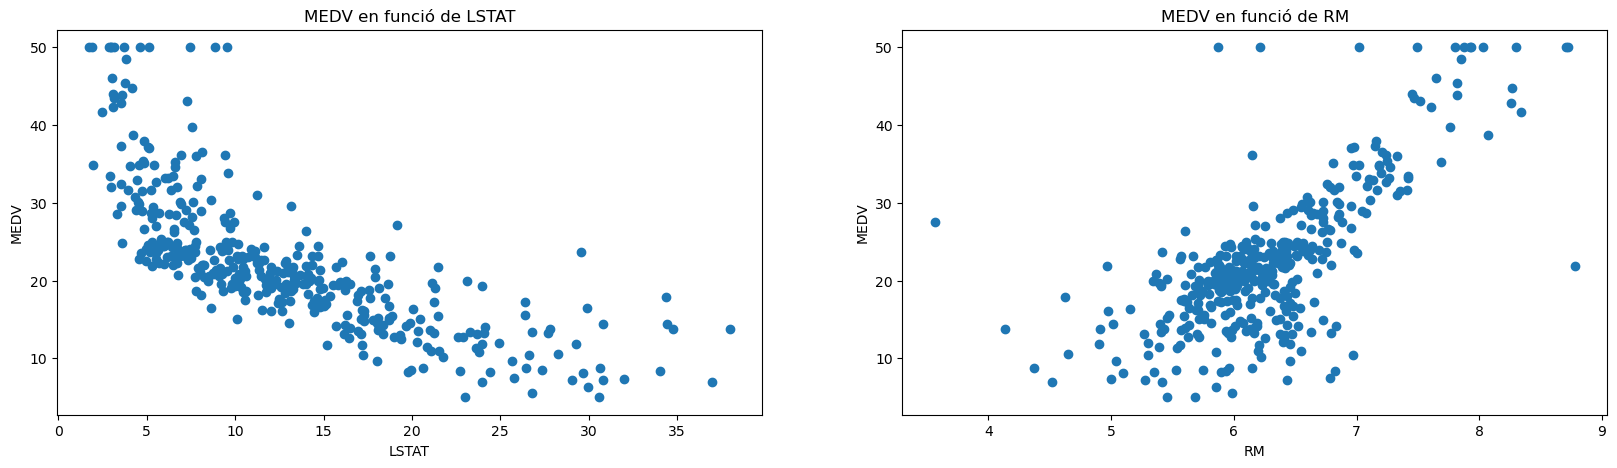

In [9]:
plt.figure(figsize = (20, 5))

X = ['LSTAT', 'RM']
Y = df['MEDV']

for i, col in enumerate(X):
    plt.subplot(1, len(X) , i + 1)
    x = df[col]
    y = Y
    plt.scatter(x, y)
    plt.title("MEDV en funció de " + col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Definim la nostra $X$ i $y$ per aplicar-hi regressió:

In [10]:
X = pd.concat((df['LSTAT'], df['RM']), axis = 1)
y = df['MEDV']

Fem train-test split:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape);

(295, 2)
(99, 2)
(295,)
(99,)


### Regressió lineal

Comencem entrenant i avaluant el model més simple

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_train)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train);

In [15]:
model.coef_

array([-0.62166069,  5.04858513])

In [16]:
y_pred = model.predict(X_train)
mean_squared_error(y_train, y_pred)

30.129654804027037

In [17]:
y_pred_test = model.predict(X_test) # No l'hauríem de mirar
mean_squared_error(y_test, y_pred_test)

23.797561259222583

In [18]:
from sklearn.model_selection import cross_val_score

# Per emmagatzemar els resultats de tots els models
resultats = []
noms = []

scores = -cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Lineal simple")

30.903088617997827


#### Extra

Podem pintar les corbes d'aprenentatge segons la mida del set de training:

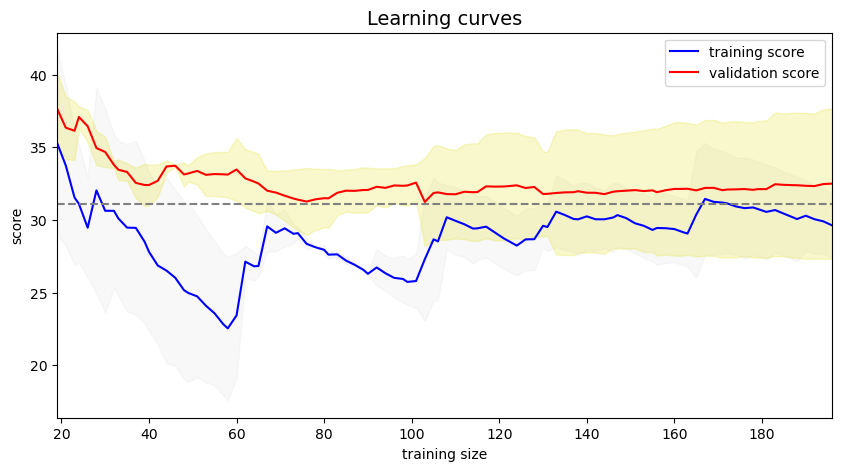

In [19]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 1, figsize = (10, 5))
train_sizes, train_scores, test_scores = learning_curve(
                                                estimator = LinearRegression(),
                                                X = X_train,
                                                y = y_train,
                                                train_sizes = np.linspace(0.1, 1.0, 100),
                                                cv = 3,
                                                scoring = 'neg_mean_squared_error')
train_scores *= -1
test_scores *= -1

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

ax.plot(train_sizes, np.mean(train_scores, 1), color = 'blue', label = 'training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD", alpha = 0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDD00", alpha = 0.2)

ax.plot(train_sizes, np.mean(test_scores, 1), color = 'red', label = 'validation score')
ax.hlines(np.mean([train_scores[-1], test_scores[-1]]), train_sizes[0], train_sizes[-1],
                 color = 'gray', linestyle = 'dashed')

#ax.set_ylim(0, 1)
ax.set_xlim(train_sizes[0], train_sizes[-1])
ax.set_xlabel('training size')
ax.set_ylabel('score')
ax.set_title('Learning curves', size = 14)
ax.legend(loc = 'best');

### Regressió amb regularització: Ridge

In [20]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha = 1) # alpha és lambda, provar valors!!
model_ridge.fit(X_train, y_train)

y_pred = model_ridge.predict(X_train)
print(mean_squared_error(y_train, y_pred))

y_pred_test = model_ridge.predict(X_test) # No l'hauríem de mirar
print(mean_squared_error(y_test, y_pred_test))

30.130669939933316
23.86482556306981


In [21]:
scores = -cross_val_score(model_ridge, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Lineal ridge")

30.894788352056388


### Estandarització i CV (Ridge)

In [22]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit(X_train).transform(X_train)
X_test_std = scaler.fit(X_train).transform(X_test)

In [23]:
model_ridge = Ridge(alpha = 1.0)
model_ridge.fit(X_train_std, y_train)


y_pred = model_ridge.predict(X_train_std)
print(mean_squared_error(y_train, y_pred))

y_pred_test = model_ridge.predict(X_test_std)
print(mean_squared_error(y_test, y_pred_test))

scores = -cross_val_score(model_ridge, X_train_std, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Lineal ridge std.")

30.129897715456167
23.804316301553346
30.894882728740424


Provem diferents valors de $\lambda$ en escala logarítmica:

In [24]:
np.logspace(-6, 6, 13)

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html?highlight=ridge%20cv#sklearn.linear_model.RidgeCV

In [25]:
model_ridge = linear_model.RidgeCV(alphas = np.logspace(-6, 6, 13), cv = 5)
model_ridge.fit(X_train_std, y_train)

model_ridge.alpha_

10.0

In [26]:
y_pred = model_ridge.predict(X_train_std)
print(mean_squared_error(y_train, y_pred))

y_pred_test = model_ridge.predict(X_test_std) # No ho hauríem de mirar
print(mean_squared_error(y_test, y_pred_test))

scores = -cross_val_score(model_ridge, X_train_std, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Lineal ridge std. CV")

30.15285521004377
23.88942722296778
30.86446779353676


### Regressió amb regularització: LASSO

In [27]:
from sklearn.linear_model import Lasso

In [28]:
model_lasso = linear_model.Lasso(alpha = 0.1)
model_lasso.fit(X_train_std, y_train)

y_pred = model_lasso.predict(X_train_std)
print(mean_squared_error(y_train, y_pred))

y_pred_test = model_lasso.predict(X_test_std) # No ho hauríem de mirar
print(mean_squared_error(y_test, y_pred_test))

scores = -cross_val_score(model_lasso, X_train_std, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Lineal lasso std.")

30.141855174118326
23.91796163722574
30.90084179995833


In [29]:
model_lasso = linear_model.LassoCV(alphas = np.logspace(-6, 6, 13), cv = 5)
model_lasso.fit(X_train_std, y_train)

model_lasso.alpha_

0.1

Ja no fem el CV perquè el millor valor era el que havíem fet servir.

### Regressió polinòmica

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomial%20features#sklearn.preprocessing.PolynomialFeatures

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

poly = Pipeline([('poly', PolynomialFeatures(degree = 4)),
                 ('linear', LinearRegression(fit_intercept = True))])
poly.fit(X_train_std, y_train)
poly['linear'].coef_

array([ 0.        , -6.92954971,  1.02913962, -1.05248322, -3.37317525,
        1.39964229,  1.75834024,  2.16970872,  0.59528733,  0.49610067,
       -0.46465072, -0.14280286,  1.19224495,  1.00587361, -0.08285323])

In [31]:
y_pred = poly.predict(X_train_std)
print(mean_squared_error(y_train, y_pred))

y_pred_test = poly.predict(X_test_std) # No ho hauríem de mirar
print(mean_squared_error(y_test, y_pred_test))

18.627299443742583
13.208189628031114


In [32]:
scores = -cross_val_score(poly, X_train_std, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

#resultados.append(scores)
#nombres.append("Polinomial std.")

31.302110126921896


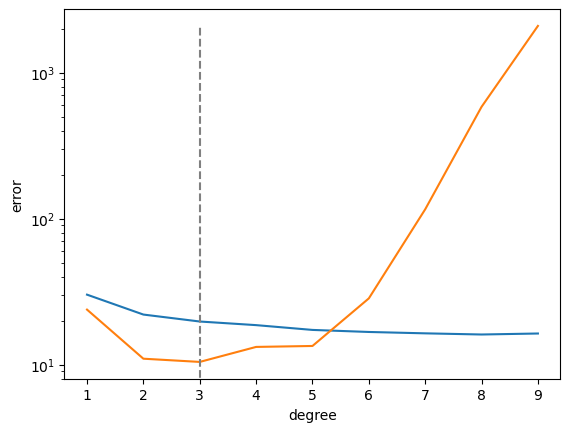

In [33]:
err = []
err_test = []
ini = 1
end = 10
for deg in range(ini, end):
    poly = Pipeline([('poly', PolynomialFeatures(degree = deg)),
                 ('linear', LinearRegression(fit_intercept = False))])
    poly.fit(X_train, y_train)

    y_pred = poly.predict(X_train)
    err.append(mean_squared_error(y_train, y_pred))
    y_pred_test = poly.predict(X_test)
    err_test.append(mean_squared_error(y_test, y_pred_test))

plt.plot(np.arange(ini, end, 1.0), err, label = 'train')
plt.plot(np.arange(ini, end, 1.0), err_test, label = 'test')
plt.xticks(np.arange(ini, end, 1.0))
plt.vlines(np.argmin(err_test) + ini, 0, max(err_test),  color = 'gray', linestyle = 'dashed')
plt.yscale('log')
plt.ylabel('error')
plt.xlabel('degree');

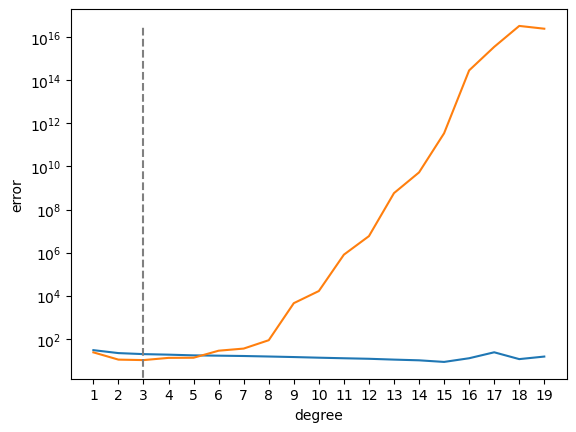

In [34]:
err = []
err_test = []
ini = 1
end = 20
for deg in range(ini, end):
    poly = Pipeline([('poly', PolynomialFeatures(degree = deg)),
                 ('linear', LinearRegression(fit_intercept = False))])
    poly.fit(X_train_std, y_train)

    y_pred = poly.predict(X_train_std)
    err.append(mean_squared_error(y_train, y_pred))
    y_pred_test = poly.predict(X_test_std)
    err_test.append(mean_squared_error(y_test, y_pred_test))

plt.plot(np.arange(ini, end, 1.0), err, label = 'train')
plt.plot(np.arange(ini, end, 1.0), err_test, label = 'test')
plt.xticks(np.arange(ini, end, 1.0))
plt.vlines(np.argmin(err_test) + ini, 0, max(err_test),  color = 'gray', linestyle = 'dashed')
plt.yscale('log')
plt.ylabel('error')
plt.xlabel('degree');

### Regressió amb més variables

Repetim el mateix procés fent servir les 6 variables més correlades amb la resposta.

In [35]:
np.abs(correlation_matrix).nlargest(6, 'MEDV')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,0.40,0.41,0.51,0.17,0.46,0.72,0.41,0.28,0.42,0.51,0.54,0.35,0.74,1.00
LSTAT,0.46,0.42,0.60,0.04,0.59,0.64,0.60,0.51,0.51,0.57,0.40,0.38,1.00,0.74
RM,0.23,0.34,0.40,0.10,0.32,1.00,0.25,0.22,0.24,0.32,0.39,0.12,0.64,0.72
PTRATIO,0.27,0.42,0.40,0.10,0.21,0.39,0.26,0.23,0.44,0.45,1.00,0.18,0.40,0.54
INDUS,0.39,0.52,1.00,0.05,0.76,0.40,0.64,0.70,0.59,0.73,0.40,0.34,0.60,0.51
TAX,0.56,0.31,0.73,0.03,0.68,0.32,0.50,0.53,0.90,1.00,0.45,0.44,0.57,0.51


In [36]:
X = pd.concat((df['LSTAT'], df['RM'], df['PTRATIO'], df['INDUS'], df['TAX']), axis = 1)
y = df['MEDV']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

scaler = preprocessing.StandardScaler()

X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.fit(X_train).transform(X_test)

/home/shuanglong/anaconda3/envs/jedi-ml/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [38]:
model_lineal = LinearRegression()
model_lineal.fit(X_train, y_train)

y_pred = model_lineal.predict(X_train)
print(mean_squared_error(y_train, y_pred))

# y_pred_test = model_lineal.predict(X_test)
# print(mean_squared_error(y_test, y_pred_test))

scores = -cross_val_score(model_lineal, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Lineal +")

26.534947285505012
27.970624674366


In [39]:
poly = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                 ('linear', LinearRegression(fit_intercept = False))])
poly.fit(X_train, y_train)

y_pred = poly.predict(X_train)
print(mean_squared_error(y_train, y_pred))

# y_pred_test = poly.predict(X_test)
# print(mean_squared_error(y_test, y_pred_test))

scores = -cross_val_score(poly, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Polinomial +")

13.964503203568468
19.214251571390427


In [40]:
poly = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                 ('ridge', Ridge(alpha = 15))])
poly.fit(X_train, y_train)

y_pred = poly.predict(X_train)
print(mean_squared_error(y_train, y_pred))

# y_pred_test = poly.predict(X_test)
# print(mean_squared_error(y_test, y_pred_test))

scores = -cross_val_score(poly, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Polinomial ridge +")

14.330469749106907
18.631758809867243


In [41]:
poly = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                 ('lasso', linear_model.Lasso(alpha = 0.05))])
poly.fit(X_train, y_train)

y_pred = poly.predict(X_train)
print(mean_squared_error(y_train, y_pred))

# y_pred_test = poly.predict(X_test)
# print(mean_squared_error(y_test, y_pred_test))

scores = -cross_val_score(poly, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Polinomial lasso +")

14.13358067170471
18.967048636298827


### Regressió amb Components Principals

In [42]:
from sklearn.decomposition import PCA

X = df.drop(['MEDV'], axis = 1)
pca = PCA()
PCs = preprocessing.StandardScaler().fit_transform(pca.fit_transform(X))

[0.8082281  0.96778928 0.98971217 0.9968992  0.99843866 0.9991663
 0.99961295 0.99987453 0.99996035 0.99999222 0.99999835 0.99999992
 1.        ]


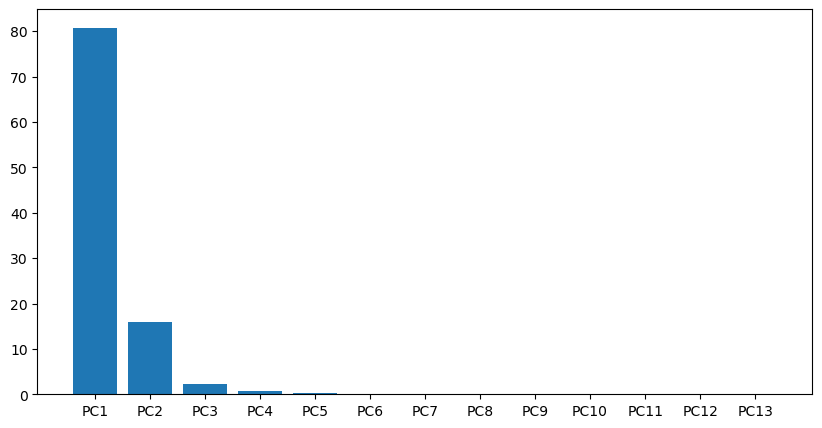

In [43]:
print(np.cumsum(pca.explained_variance_ratio_))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(x = range(1, X.shape[1] + 1),
        height = np.round(pca.explained_variance_ratio_ * 100, decimals = 1),
        tick_label = ['PC' + str(i) for i in range(1, X.shape[1] + 1)]);

In [44]:
X_pca = pd.DataFrame(PCs,
                     columns = ['PC' + str(i) for i in range(1, X.shape[1] + 1)])
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.672299,-0.073350,-0.090936,0.305710,-0.196747,-1.137509,-0.230860,1.803857,-1.124502,-0.184305,0.817869,-0.208253,0.688318
1,-0.953937,0.122722,-1.050924,0.121893,0.071007,-0.538512,-0.133374,0.280512,0.194677,1.210956,0.103983,-0.328469,-0.682282
2,-0.956617,0.172248,-0.578821,-0.611300,0.027663,-1.092066,0.406789,0.153114,0.142405,0.801799,-0.964551,-0.402839,-0.162533
3,-1.076519,0.222530,-0.236201,-1.205150,0.239902,-1.234127,-0.482646,0.358955,0.526366,0.818015,-0.590904,-0.207283,0.673009
4,-1.069241,0.229228,-0.570510,-0.679311,0.225205,-1.087608,-0.762795,0.451088,0.629514,1.133656,0.421960,-0.144142,0.301984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,-0.140046,-0.404103,-0.470075,-0.290023,-0.293180,0.450126,-0.327472,0.918294,0.020617,-1.205075,1.060341,-0.120195,0.407367
390,-0.139014,-0.418020,-0.626059,-0.041220,-0.339342,0.185084,-0.320298,0.957625,0.142876,-0.976301,0.286461,-0.194237,0.435892
391,-0.785254,0.009812,-0.916734,-0.015535,-0.101810,-0.214498,0.968588,0.033738,1.577584,-1.532088,0.536482,-0.220990,0.823553
392,-0.778938,0.009733,-1.269323,0.552433,-0.268765,-1.115448,1.115403,0.113430,1.890817,-1.278070,-0.548979,-0.367936,0.765317


In [45]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype='object')

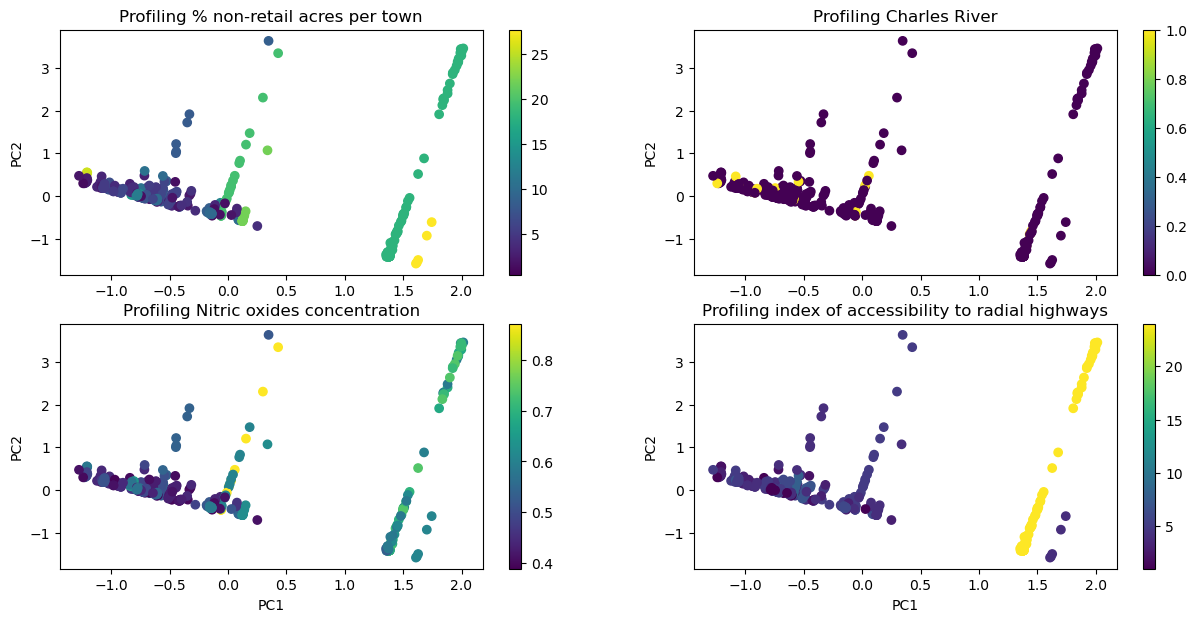

In [46]:
fig, ax = plt.subplots(2,2, figsize = (15,7))

im1 = ax[0,0].scatter(X_pca['PC1'], X_pca['PC2'], c = df['INDUS'])
fig.colorbar(im1, ax = ax[0,0])
im2 = ax[0,1].scatter(X_pca['PC1'], X_pca['PC2'], c = df['CHAS'])
fig.colorbar(im2, ax = ax[0,1])
im3 = ax[1,0].scatter(X_pca['PC1'], X_pca['PC2'], c = df['NOX'])
fig.colorbar(im3, ax = ax[1,0])
im4 = ax[1,1].scatter(X_pca['PC1'], X_pca['PC2'], c = df['RAD'])
fig.colorbar(im4, ax = ax[1,1])

ax[0,0].set_ylabel("PC2")
ax[0,1].set_ylabel("PC2")
ax[1,0].set_xlabel("PC1"), ax[1,0].set_ylabel("PC2")
ax[1,1].set_xlabel("PC1"), ax[1,1].set_ylabel("PC2")

ax[0,0].set_title("Profiling % non-retail acres per town")
ax[0,1].set_title("Profiling Charles River")
ax[1,0].set_title("Profiling Nitric oxides concentration")
ax[1,1].set_title("Profiling index of accessibility to radial highways");

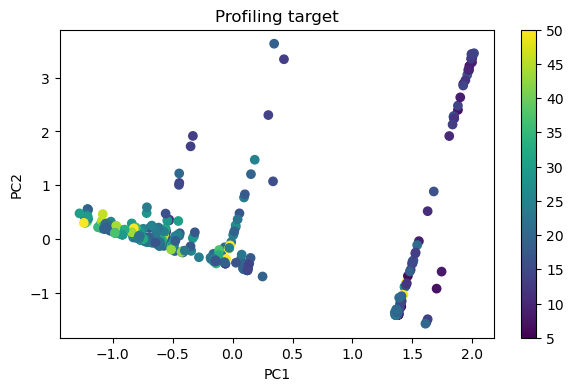

In [47]:
fig, ax = plt.subplots(1,1, figsize = (7,4))

im1 = ax.scatter(X_pca['PC1'], X_pca['PC2'], c = df['MEDV'], marker = 'o')
fig.colorbar(im1, ax = ax)

ax.set_xlabel("PC1"), ax.set_ylabel("PC2")
ax.set_title("Profiling target");

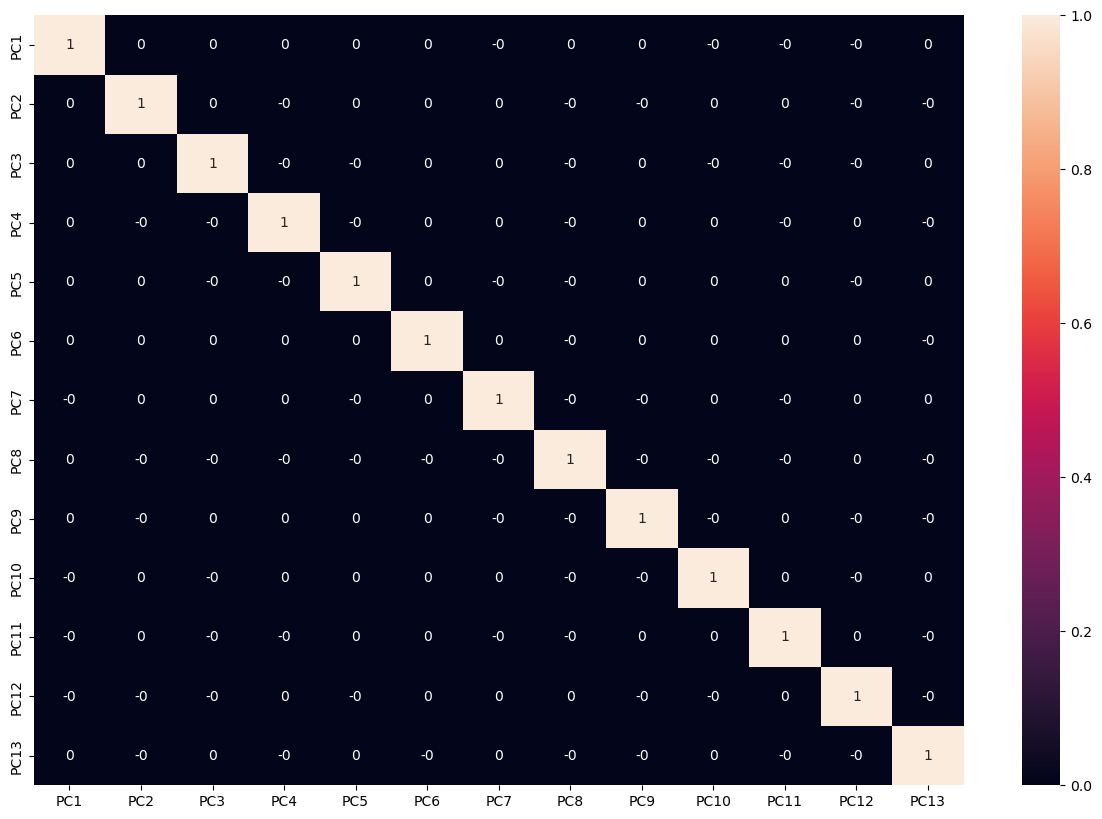

In [48]:
correlation_matrix = X_pca.corr().round(2)

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(data = correlation_matrix, annot = True, ax = ax);

In [49]:
X = X_pca
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [50]:
model_lineal = LinearRegression()
model_lineal.fit(X_train, y_train)

y_pred = model_lineal.predict(X_train)
print(mean_squared_error(y_train, y_pred))

# y_pred_test = model_lineal.predict(X_test)
# print(mean_squared_error(y_test, y_pred_test))

scores = -cross_val_score(model_lineal, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Lineal pca")

21.220611727460785
24.36100509252376


In [51]:
poly = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                 ('linear', LinearRegression(fit_intercept = False))])
poly.fit(X_train, y_train)

y_pred = poly.predict(X_train)
print(mean_squared_error(y_train, y_pred))

# y_pred_test = poly.predict(X_test)
# print(mean_squared_error(y_test, y_pred_test))

scores = -cross_val_score(poly, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Polinomial pca")

4.9425680245263655
4.5407050876052924e+20


In [52]:
steps = [
    ('poly', PolynomialFeatures(degree = 2)),
    ('model', Ridge(alpha = 15))
]

poly_ridge = Pipeline(steps)
poly_ridge.fit(X_train, y_train)

y_pred = poly_ridge.predict(X_train)
print(mean_squared_error(y_train, y_pred))

# y_pred_test = poly_ridge.predict(X_test)
# print(mean_squared_error(y_test, y_pred_test))

scores = -cross_val_score(poly_ridge, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Polinomial ridge pca")

5.795972855200027
17.363558966946847


In [53]:
steps = [
    ('poly', PolynomialFeatures(degree = 2)),
    ('model', linear_model.Lasso(alpha = 0.05))
]

poly_lasso = Pipeline(steps)
poly_lasso.fit(X_train, y_train)

y_pred = poly_lasso.predict(X_train)
print(mean_squared_error(y_train, y_pred))

# y_pred_test = poly_lasso.predict(X_test)
# print(mean_squared_error(y_test, y_pred_test))

scores = -cross_val_score(poly_lasso, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

resultats.append(scores)
noms.append("Polinomial lasso pca")

5.960200060896193
15.406460520315338


Quan tenim un nombre elevat d'hiperparàmetres i per cadascun hem de provar una sèrie de valors, la millor manera de fer-ho és utilitzant `GridSearchCV`:

In [54]:
np.arange(0, 100, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

parameters = [ {'model__alpha': np.arange(0, 100, 1), 'poly__degree': [2,3,4]} ]

scoring_func = make_scorer(mean_squared_error)
grid_search = GridSearchCV(estimator = poly_ridge,
                           param_grid = parameters,
                           scoring = scoring_func,
                           cv = 10,
                           n_jobs = 2)
grid_search = grid_search.fit(X_train, y_train)

In [56]:
grid_search.cv_results_['mean_test_score'][::3]

array([27.48338981, 19.59139348, 18.21038216, 17.33539415, 16.72418497,
       16.26997772, 15.91802525, 15.63713663, 15.40809751, 15.21833835,
       15.05923658, 14.92464615, 14.81004619, 14.71202296, 14.62794101,
       14.55572692, 14.49372261, 14.44058316, 14.39520394, 14.35666756,
       14.32420456, 14.29716375, 14.27498965, 14.25720484, 14.24339631,
       14.23320452, 14.22631471, 14.22244983, 14.22136489, 14.22284219,
       14.22668752, 14.23272685, 14.24080374, 14.25077697, 14.26251872,
       14.27591286, 14.29085362, 14.30724436, 14.32499656, 14.34402896,
       14.36426671, 14.3856408 , 14.40808739, 14.43154734, 14.45596574,
       14.48129154, 14.50747715, 14.53447817, 14.56225308, 14.59076302,
       14.61997152, 14.64984438, 14.6803494 , 14.7114563 , 14.74313651,
       14.77536308, 14.80811055, 14.84135483, 14.87507312, 14.90924381,
       14.94384639, 14.97886141, 15.01427036, 15.05005565, 15.08620053,
       15.12268906, 15.15950603, 15.19663693, 15.23406792, 15.27

In [57]:
len(grid_search.cv_results_['mean_test_score'])

300

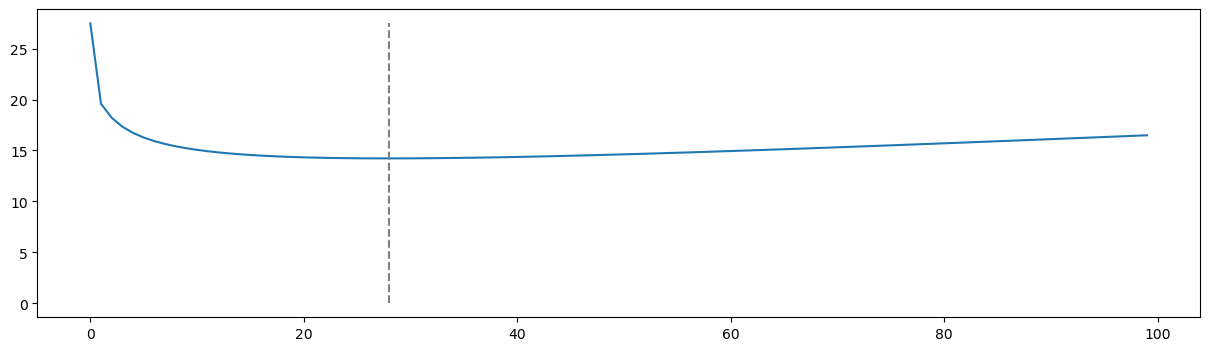

In [58]:
fig, ax = plt.subplots(figsize = (15,4))
ax.plot(np.arange(0, 100, 1), grid_search.cv_results_['mean_test_score'][::3])
plt.vlines(np.argmin(grid_search.cv_results_['mean_test_score'][::3]), 0, max(grid_search.cv_results_['mean_test_score'][::3]),  color = 'gray', linestyle = 'dashed')

In [59]:
np.argmin(grid_search.cv_results_['mean_test_score'][::3])

28

In [60]:
steps = [
    ('poly', PolynomialFeatures(degree = 2)),
    ('model', Ridge(alpha = 15))
]

poly_ridge = Pipeline(steps)
poly_ridge.fit(X_train, y_train)

y_pred = poly_ridge.predict(X_train)
print(mean_squared_error(y_train, y_pred))

y_pred_test = poly_ridge.predict(X_test)
print(mean_squared_error(y_test, y_pred_test))

5.795972855200027
11.342448716296925


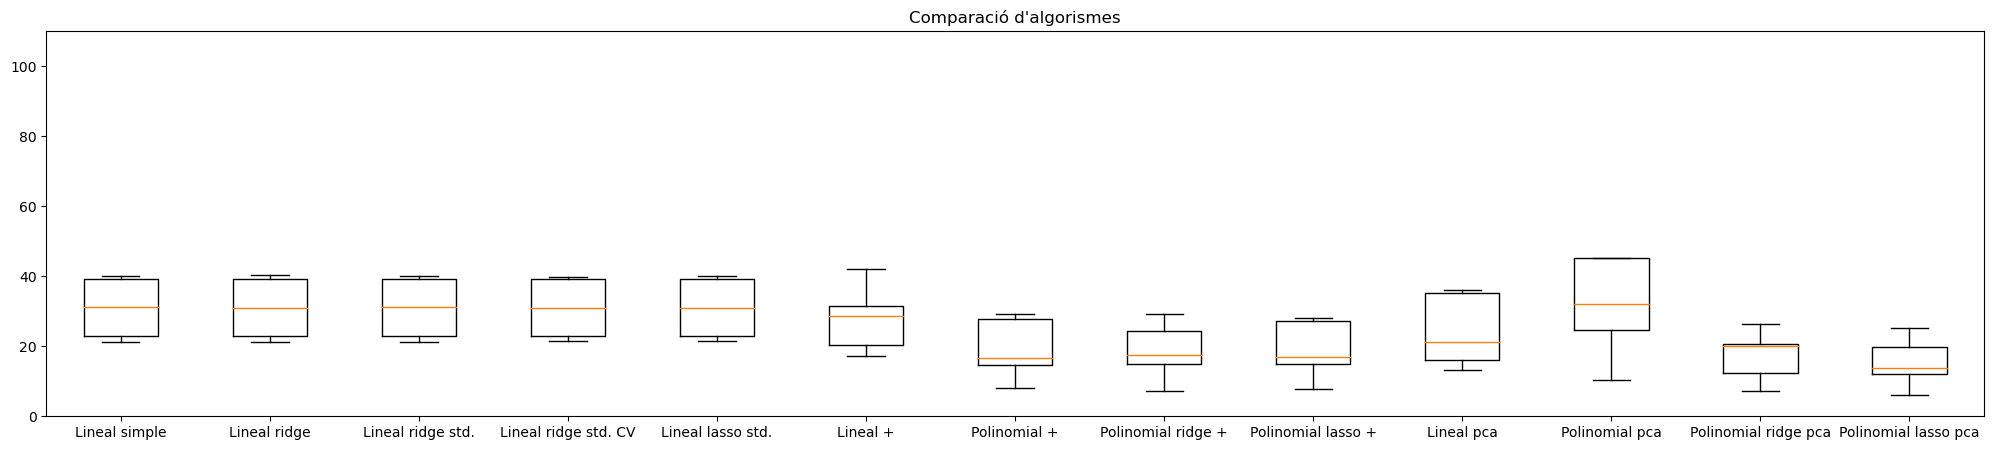

In [61]:
fig, ax = plt.subplots(1, 1, figsize = (25,5))
ax.set_title('Comparació d\'algorismes')
ax.boxplot(resultats)
ax.set_xticklabels(noms)
ax.set_ylim(0,110)
plt.show()

### Extra: validació creuada repetida

In [62]:
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits = 5, n_repeats = 20, random_state = 7)
X = pd.concat((df['LSTAT'], df['RM'], df['PTRATIO'], df['INDUS'], df['TAX']), axis = 1)
#list(rkf.split(X))

In [63]:
Y = df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 7)

pipelines = []

pipelines.append(('scaled_linear', Pipeline([('scaler', preprocessing.StandardScaler()),
                                        ('linear', LinearRegression())
                                       ])))
pipelines.append(('scaled_linear_ridge', Pipeline([('scaler', preprocessing.StandardScaler()),
                                        ('ridge', Ridge(alpha = 15))
                                       ])))
pipelines.append(('scaled_poly', Pipeline([('scaler', preprocessing.StandardScaler()),
                                           ('poly', PolynomialFeatures(degree = 2)),
                                           ('linear', LinearRegression())
                                       ])))
pipelines.append(('scaled_poly_ridge', Pipeline([('scaler', preprocessing.StandardScaler()),
                                        ('poly', PolynomialFeatures(degree = 2)),
                                        ('ridge', Ridge(alpha = 15))
                                       ])))
pipelines.append(('scaled_poly_lasso', Pipeline([('scaler', preprocessing.StandardScaler()),
                                        ('poly', PolynomialFeatures(degree = 2)),
                                        ('lasso', Ridge(alpha = 0.05))
                                       ])))
pipelines.append(('poly_ridge', Pipeline([('poly', PolynomialFeatures(degree = 2)),
                                        ('ridge', Ridge(alpha = 15))
                                       ])))
pipelines.append(('poly_lasso', Pipeline([('poly', PolynomialFeatures(degree = 2)),
                                        ('lasso', Ridge(alpha = 0.05))
                                       ])))
resultats = []
noms = []

for nom, model in pipelines:

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    rkf = RepeatedKFold(n_splits = 5, n_repeats = 20, random_state = 7)
    resultats_nk = []
    for train_index, test_index in rkf.split(X):
        X_train_nk, X_test_nk = X.values[train_index], X.values[test_index]
        Y_train_nk, Y_test_nk = Y.values[train_index], Y.values[test_index]
        scores = -cross_val_score(model, X_train_nk, Y_train_nk, cv = 5, scoring = 'neg_mean_squared_error')
        resultats_nk.append(scores.mean())

    resultats.append(resultats_nk)
    noms.append(nom)
    print("%s: %f (%f)" % (nom, np.mean(resultats_nk), np.std(resultats_nk)))
    #print(f"{}")

    print("Mètriques: \n \t MSE: {} \n \t MAE: {} \n \t RMSE: {} \n \t R2: {} \n".format(
    metrics.mean_squared_error(Y_test, y_pred_test),
    metrics.mean_absolute_error(Y_test, y_pred_test),
    np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test)),
    metrics.r2_score(Y_test, y_pred_test)))


scaled_linear: 34.706059 (4.090306)
Mètriques: 
 	 MSE: 18.59455487727073 
 	 MAE: 3.2744011419936214 
 	 RMSE: 4.312140405560878 
 	 R2: 0.781674045795225 

scaled_linear_ridge: 33.353625 (3.803391)
Mètriques: 
 	 MSE: 18.429322863043286 
 	 MAE: 3.2432000263926457 
 	 RMSE: 4.292938721091099 
 	 R2: 0.7836140996125649 

scaled_poly: 26.753582 (4.342126)
Mètriques: 
 	 MSE: 7.090633925894861 
 	 MAE: 2.109693176092076 
 	 RMSE: 2.6628244264117114 
 	 R2: 0.916746088948865 

scaled_poly_ridge: 22.342632 (3.400085)
Mètriques: 
 	 MSE: 6.555479903015514 
 	 MAE: 2.06241479516016 
 	 RMSE: 2.560367142230878 
 	 R2: 0.923029542006108 

scaled_poly_lasso: 26.688730 (4.327949)
Mètriques: 
 	 MSE: 7.087551188208182 
 	 MAE: 2.109556615503862 
 	 RMSE: 2.6622455161401213 
 	 R2: 0.9167822845798683 

poly_ridge: 25.403678 (4.069631)
Mètriques: 
 	 MSE: 6.17073366934108 
 	 MAE: 1.982626935639232 
 	 RMSE: 2.4840961473624725 
 	 R2: 0.9275469982801671 

poly_lasso: 26.291355 (4.212993)
Mètriques

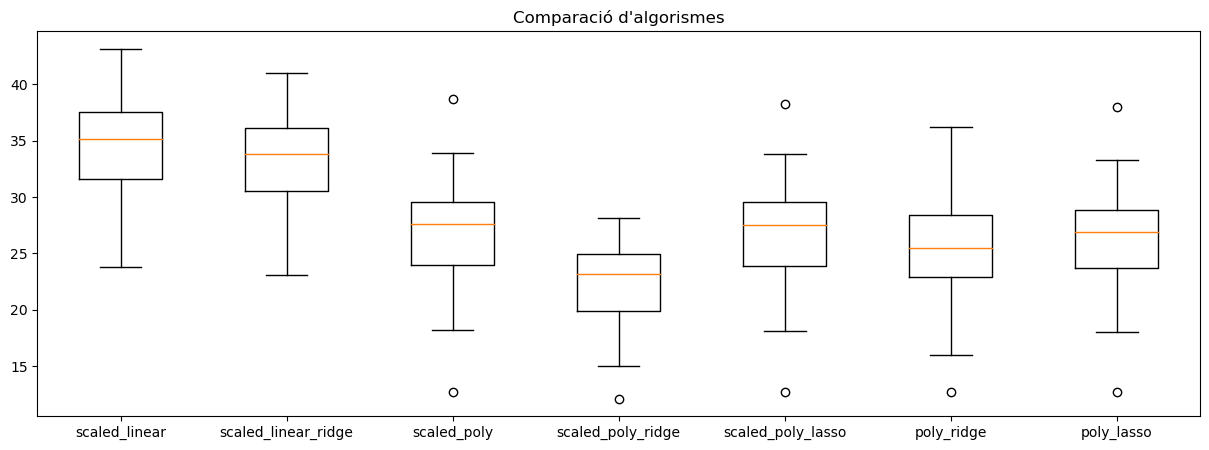

In [64]:
fig, ax = plt.subplots(1, 1, figsize = (15,5))
ax.set_title('Comparació d\'algorismes')
ax.boxplot(resultats)
ax.set_xticklabels(noms)
plt.show()

---
## A practicar

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Predicció de la qualitat (nombre enter de l'1 al 10) del vi a partir de les seves característiques, com la acidesa, els sulfats o el % d'alcohol.

In [5]:
df = pd.read_csv('./DataSets/winequality-red.csv')
# pd.set_option('display.max_columns', 500)

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
if df.isnull().sum().sum() != 0:
    print('Has NaN value.')
else:
    print('Not NaN values.')

Not NaN values.


<Axes: >

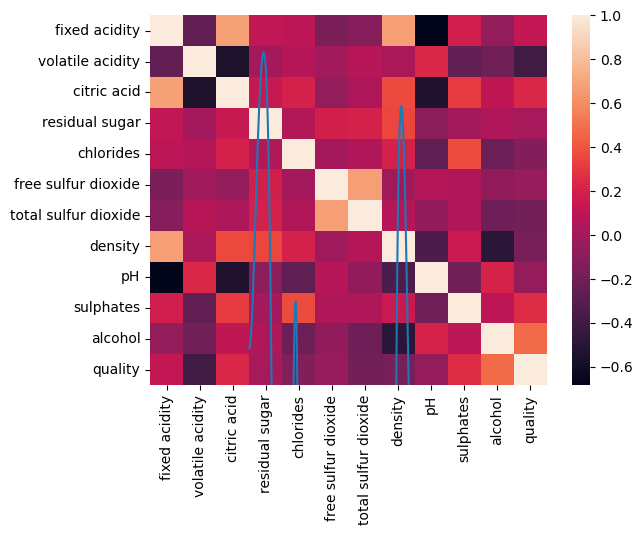

In [24]:
sns.histplot(df['quality'], bins = 10, kde=True)
correlation_matrix = df.corr() # arrodonir a 2 decimals
sns.heatmap(correlation_matrix)

Idees:
- Calcular la matriu de correlació, mirar el heatmap i veure quines variables estan més relacionades amb la resposta.
- Entrenar alguns models fent servir pipeline, `GridSearchCV` i mirar els seus errors.